# Assignment 5 - NLP

## Student Details

**`Name`** Montgomery Gole, Viral Bankimbhai Thakar

**`Email`** mgole@torontomu.ca, vthakar@torontomu.ca

**`Student ID`** 501156495, 501213983

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


## PART 1: Natural Language Processing- Finding Text Similarities

This part is about finding similarities in text and document. **By considering following sentences
and using any similarity or a clustering methods ( e.g., k-Means or hierarchical clustering) show
the more similar sentences.** 

Use at least three methods from TF, TF-IDF, bag of the words, Word2Vec or shingling techniques, and consequently, use a proper distance measure (e.g. Jaccard, Cosine, Edit and Hamming distance) cluster following data and show the similarity between them. 

Note that if you want to create your own distance measure, you should prove it is a valid distance measure. Here are the sentences

In [3]:
data_dict = {
    "id": [1, 2, 3, 4, 5, 6],
    "text": [
        "In the past John liked only sport but now he likes sport and politics",
        "Sam only liked politics but now he is fan of both music and politics",
        "Sara likes both books and politics but in the past she only read books",
        "Robert loved both books and nature but now he only reads books",
        "Linda liked books and sport but she only likes sport now",
        "Alison used to loved nature but currently she likes both nature and sport"
    ]
}

data_copy_dict = data_dict.copy()

As a first step before we begin any preprocessing of the data, we need to apply some preprocessing to our test data. 
- Convert text to lower case.
- Remove punctuation.
- Tokenize text.

In [4]:
# Define a function to preprocess the text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]
    text = ' '.join(tokens)
    return text

# Preprocess the text in the data_dict
data_dict['text'] = [preprocess_text(text) for text in data_dict['text']]
data_dict

{'id': [1, 2, 3, 4, 5, 6],
 'text': ['past john liked sport likes sport politics',
  'sam liked politics fan music politics',
  'sara likes books politics past read books',
  'robert loved books nature reads books',
  'linda liked books sport likes sport',
  'alison used loved nature currently likes nature sport']}

### Bag of Words with Cosine Distance

In [5]:
# Create a bag of words matrix
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(data_dict['text'])

# Calculate pairwise cosine similarity between the sentences
cosine_sim = cosine_similarity(bow_matrix)

# Print the similarity matrix
print(cosine_sim)

[[1.         0.35355339 0.33333333 0.         0.70710678 0.31622777]
 [0.35355339 1.         0.23570226 0.         0.125      0.        ]
 [0.33333333 0.23570226 1.         0.47140452 0.35355339 0.10540926]
 [0.         0.         0.47140452 1.         0.25       0.3354102 ]
 [0.70710678 0.125      0.35355339 0.25       1.         0.3354102 ]
 [0.31622777 0.         0.10540926 0.3354102  0.3354102  1.        ]]


In [6]:
def print_top_similar_pairs(data_dict, similarity_matrix, n=5):
    # Get the number of sentences
    num_sentences = len(data_dict['text'])
    # Initialize a list to store the pairs of similar sentences
    similar_pairs = []
    # Loop over all possible pairs of sentences
    for i in range(num_sentences):
        for j in range(i + 1, num_sentences):
            # Get the similarity score for the pair of sentences
            similarity_score = similarity_matrix[i, j]
            # Add the pair of sentences and the similarity score to the list
            similar_pairs.append((i, j, similarity_score))
    # Sort the list in descending order by similarity score
    similar_pairs = sorted(similar_pairs, key=lambda x: x[2], reverse=True)
    # Print the top five similar pairs
    print("Top 5 similar sentence pairs:")
    for pair in similar_pairs[:n]:
        print(f"Sentence {pair[0] + 1}: {data_dict['text'][pair[0]]}")
        print(f"Sentence {pair[1] + 1}: {data_dict['text'][pair[1]]}")
        print(f"Similarity score: {pair[2]}")
        print()


print_top_similar_pairs(data_copy_dict, cosine_sim, 5)

Top 5 similar sentence pairs:
Sentence 1: In the past John liked only sport but now he likes sport and politics
Sentence 5: Linda liked books and sport but she only likes sport now
Similarity score: 0.7071067811865475

Sentence 3: Sara likes both books and politics but in the past she only read books
Sentence 4: Robert loved both books and nature but now he only reads books
Similarity score: 0.4714045207910316

Sentence 1: In the past John liked only sport but now he likes sport and politics
Sentence 2: Sam only liked politics but now he is fan of both music and politics
Similarity score: 0.35355339059327373

Sentence 3: Sara likes both books and politics but in the past she only read books
Sentence 5: Linda liked books and sport but she only likes sport now
Similarity score: 0.35355339059327373

Sentence 4: Robert loved both books and nature but now he only reads books
Sentence 6: Alison used to loved nature but currently she likes both nature and sport
Similarity score: 0.33541019662

### TF-IDF with Cosine Distance:

Using TF-IDF method, we can represent each sentence as a vector of TF-IDF scores. We can then calculate the cosine similarity between each pair of vectors to find the similarity between sentences. Here's the code:

In [7]:
# Create a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data_dict['text'])

# Calculate pairwise cosine similarity between the sentences
cosine_sim = cosine_similarity(tfidf_matrix)

# Print the similarity matrix
print(cosine_sim)

[[1.         0.27961795 0.29175285 0.         0.60384727 0.22074055]
 [0.27961795 1.         0.17723303 0.         0.10034482 0.        ]
 [0.29175285 0.17723303 1.         0.35896596 0.27375705 0.05636227]
 [0.         0.         0.35896596 1.         0.20323737 0.32788468]
 [0.60384727 0.10034482 0.27375705 0.20323737 1.         0.23764752]
 [0.22074055 0.         0.05636227 0.32788468 0.23764752 1.        ]]


In [8]:
print_top_similar_pairs(data_copy_dict, cosine_sim, 5)

Top 5 similar sentence pairs:
Sentence 1: In the past John liked only sport but now he likes sport and politics
Sentence 5: Linda liked books and sport but she only likes sport now
Similarity score: 0.6038472688979556

Sentence 3: Sara likes both books and politics but in the past she only read books
Sentence 4: Robert loved both books and nature but now he only reads books
Similarity score: 0.3589659642687218

Sentence 4: Robert loved both books and nature but now he only reads books
Sentence 6: Alison used to loved nature but currently she likes both nature and sport
Similarity score: 0.3278846815814845

Sentence 1: In the past John liked only sport but now he likes sport and politics
Sentence 3: Sara likes both books and politics but in the past she only read books
Similarity score: 0.29175284985914557

Sentence 1: In the past John liked only sport but now he likes sport and politics
Sentence 2: Sam only liked politics but now he is fan of both music and politics
Similarity score: 0

### Word2Vec with Cosine Distance

In [9]:
# Train a Word2Vec model on the text data
sentences = [sentence.split() for sentence in data_dict['text']]
model = Word2Vec(sentences, min_count=1, vector_size=100)

# Compute the sentence embeddings using the Word2Vec model
embeddings = []
for sentence in sentences:
    sentence_embeddings = [model.wv[word] for word in sentence if word in model.wv.key_to_index]
    if len(sentence_embeddings) > 0:
        embeddings.append(sum(sentence_embeddings) / len(sentence_embeddings))
    else:
        embeddings.append([0]*100)

# Calculate pairwise cosine similarity between the sentence embeddings
cosine_sim = cosine_similarity(embeddings)

# Print the similarity matrix
print(cosine_sim)

[[ 0.99999994  0.31212682  0.23183241  0.01111337  0.65438104  0.37367558]
 [ 0.31212682  1.          0.31147927 -0.08969244  0.13175897  0.10459457]
 [ 0.23183241  0.31147927  1.0000001   0.4081449   0.29831243  0.15420693]
 [ 0.01111337 -0.08969244  0.4081449   0.99999976  0.36348772  0.38986403]
 [ 0.65438104  0.13175897  0.29831243  0.36348772  1.0000002   0.46709365]
 [ 0.37367558  0.10459457  0.15420693  0.38986403  0.46709365  0.9999999 ]]


In [10]:
print_top_similar_pairs(data_copy_dict, cosine_sim, 5)

Top 5 similar sentence pairs:
Sentence 1: In the past John liked only sport but now he likes sport and politics
Sentence 5: Linda liked books and sport but she only likes sport now
Similarity score: 0.6543810367584229

Sentence 5: Linda liked books and sport but she only likes sport now
Sentence 6: Alison used to loved nature but currently she likes both nature and sport
Similarity score: 0.46709364652633667

Sentence 3: Sara likes both books and politics but in the past she only read books
Sentence 4: Robert loved both books and nature but now he only reads books
Similarity score: 0.40814489126205444

Sentence 4: Robert loved both books and nature but now he only reads books
Sentence 6: Alison used to loved nature but currently she likes both nature and sport
Similarity score: 0.3898640275001526

Sentence 1: In the past John liked only sport but now he likes sport and politics
Sentence 6: Alison used to loved nature but currently she likes both nature and sport
Similarity score: 0.373

### K-Means Clustering on Word2Vec Feature Vectors

In [11]:
from sklearn.cluster import KMeans

# Apply k-means clustering to the sentence embeddings
kmeans = KMeans(n_clusters=3, random_state=0).fit(embeddings)

# Print the cluster assignments for each sentence
for i, cluster_label in enumerate(kmeans.labels_):
    print(f"Sentence {i+1} {data_copy_dict['text'][i]} belongs to cluster {cluster_label+1}")

Sentence 1 In the past John liked only sport but now he likes sport and politics belongs to cluster 1
Sentence 2 Sam only liked politics but now he is fan of both music and politics belongs to cluster 3
Sentence 3 Sara likes both books and politics but in the past she only read books belongs to cluster 2
Sentence 4 Robert loved both books and nature but now he only reads books belongs to cluster 2
Sentence 5 Linda liked books and sport but she only likes sport now belongs to cluster 1
Sentence 6 Alison used to loved nature but currently she likes both nature and sport belongs to cluster 1


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## PART 2: Finding Communities by Girvan-Newman Algorithm

In [12]:
figsize = (8, 8)
nodesize = 1000
font_size = 12
node_color = 'lightblue'

> A community, with respect to graphs, can be defined as a subset of nodes that are densely connected to each other and loosely connected to the nodes in the other communities in the same graph. - analyticsvidhya.com

The Girvan-Newman algorithm calculates the number of shortest path going through edges. By calculating the shortest path we can then find the communities of a social network graph. The question is to find communities in the attached graph (shown below).

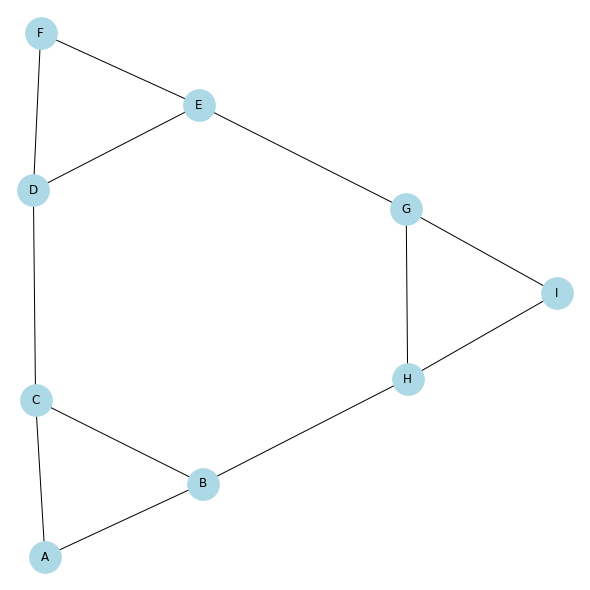

In [13]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# create the graph
main_graph = nx.Graph()

# add nodes
main_graph.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])

# add edges
main_graph.add_edges_from(
    [
        ('A', 'B'), 
        ('A', 'C'), 
        ('B', 'C'), 
        ('B', 'H'), 
        ('C', 'D'), 
        ('D', 'E'), 
        ('D', 'F'), 
        ('E', 'F'), 
        ('E', 'G'), 
        ('G', 'H'), 
        ('G', 'I'), 
        ('H', 'I')
    ]
)

# plot the graph
plt.figure(figsize=figsize)
nx.draw(main_graph, with_labels=True, node_size=nodesize, font_size=font_size, node_color=node_color)
plt.show()

### Using Built In Function

Let's use built in method from `networkx` library to create communities. This is just to have reference results and compare our implementation with it. 

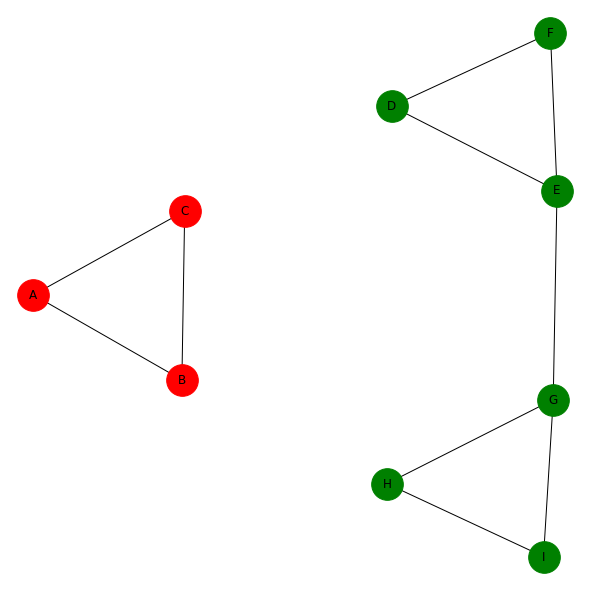

In [14]:
# find communities using Girvan-Newman algorithm
comp = nx.algorithms.community.girvan_newman(main_graph)

# find the communities
communities = []
for c in next(comp):
    communities.append(c)

# create a subgraph for each community
subgraphs = []
for c in communities:
    subgraphs.append(main_graph.subgraph(c))

# plot the subgraphs
plt.figure(figsize=figsize)
pos = nx.spring_layout(main_graph)
colors = ['r', 'g', 'b']
for i, sg in enumerate(subgraphs):
    nx.draw(
        sg, 
        pos, 
        with_labels=True, 
        node_color=colors[i], 
        node_size=nodesize, font_size=font_size
    )
plt.show()

As we can see here that the edge between Node `B` and `H` as well as the edge between Node `C` and `D` has the same and highest `betweenness centrality` and that is why those eadges are removed while creating communities using Girvan-Newman algorithm.

### Avoid Using Built-In Function

Now in the next step, we are interested to actually understand how Girvan-Newman algorithm works. For that instead of using the built-in method from `networkx` library we will be implementing our own version of it using simple python and some other functionalities from `networkx` library. **We will not use `nx.algorithms.community.girvan_newman()` explicitly.**

Here we can see that first it removes the edge between Node `B` and `H`, then removes the edge between Node `C` and `D` and at the end removes the edge between Node `G` and `H` to create different levels of communities. 

Now let's see that if we don't use NetworkX library and follow the steps mentioned in the Assignment, whether we can get the same results or not. 

This algorithm involves three steps: A brief description of each step is provided on the above graph as follows:

**Step I:** The algorithm begins by performing a breadth-first search (BFS) of the graph, starting at the node X. Edges between different levels are called DAG edges (“DAG” stands for directed acyclic graph). In the above graph if we start by node B as root we get the below graph. Solid edges are DAG edges and dashed edges connect nodes at the same level:


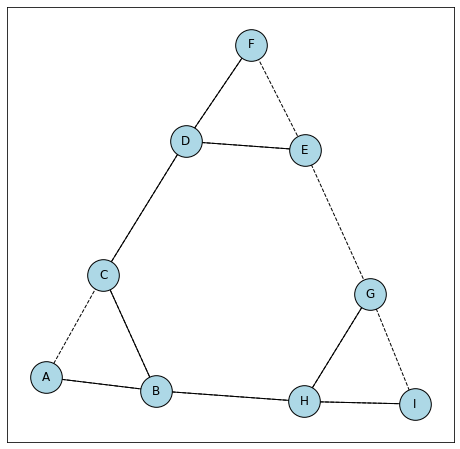

In [15]:
root = 'B'
G = main_graph.copy()

# Perform BFS starting from node B
bfs_tree = nx.bfs_tree(G, 'B')

# Compute node positions that try to evenly distribute the nodes vertically
pos = nx.spring_layout(G, seed=42, iterations=500, scale=2)

# Compute the BFS level for each node
bfs_level = {}
bfs_level['B'] = 0
for i, level in enumerate(nx.bfs_successors(bfs_tree, 'B')):
    for node in level[1]:
        bfs_level[node] = i + 1

# Draw the nodes for each level
plt.figure(figsize=figsize)
for level in range(max(bfs_level.values()) + 1):
    nodes = [node for node in bfs_tree.nodes() if bfs_level[node] == level]
    nx.draw_networkx_nodes(bfs_tree, pos, nodelist=nodes, node_size=nodesize, node_color='lightblue', edgecolors='black')

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), style='dashed')
nx.draw_networkx_edges(bfs_tree, pos, edgelist=bfs_tree.edges(), style='solid')

# Draw the labels
nx.draw_networkx_labels(G, pos, font_size=font_size)

# Show the plot
plt.show()

This graph and the edges matches the one provided in the Assignment Document. **There is a small mistake in Assignment Document - Where Edge between Node E and Node G should be `dashed` and not `solid`.**

Step II: The second step of the GN algorithm is to label each node by the number of shortest paths that reach it from the root. Start by labeling the root by 1. Then, from the top down, label each node by the sum of the labels of its parents . Show the resulted graph.

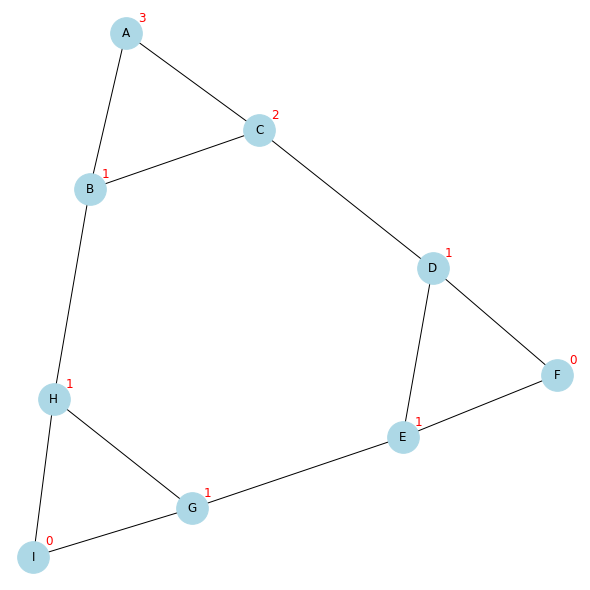

In [16]:
G = main_graph.copy()

nx.set_node_attributes(G, {node: 0 for node in G.nodes}, 'label')

# label the root node B with 1
nx.set_node_attributes(G, {'B': 1 }, 'label')

# label each node by the sum of the labels of its parents
for node in nx.dfs_postorder_nodes(G, source='B'):
    if node == 'B':
        continue
    label_sum = sum(G.nodes[parent]['label'] for parent in G.neighbors(node))
    G.nodes[node]['label'] = label_sum

# plot the graph with labels
plt.figure(figsize=figsize)
pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_size=nodesize, font_size=font_size, node_color=node_color)
nx.draw_networkx_labels(main_graph, {key: val+(0.05, 0.05) for key, val in pos.items()}, labels=labels, font_color='r')
plt.show()

Step III: The third and final step is to calculate the credit, for each node and for edges between the nodes. Show the resulted graph in each step.

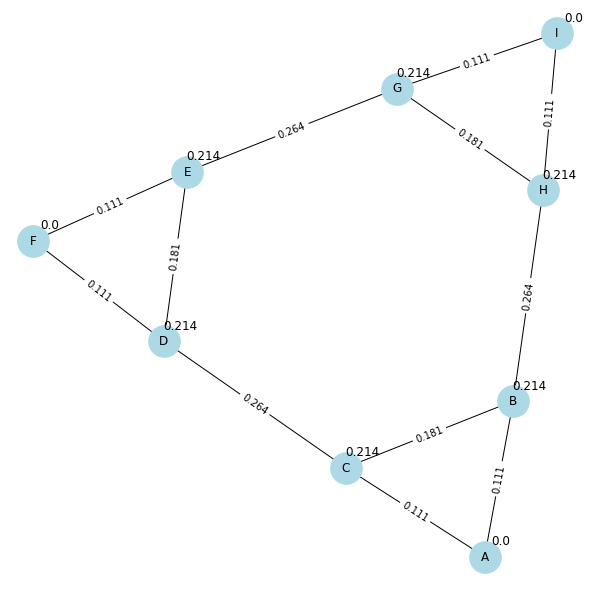

In [17]:
from networkx.algorithms.centrality import betweenness_centrality

# calculate betweenness centrality of nodes and edges
node_credit = betweenness_centrality(G)
edge_credit = nx.edge_betweenness_centrality(G)

# draw the graph
plt.figure(figsize=figsize)
pos = nx.spring_layout(main_graph)
nx.draw(main_graph, pos, with_labels=True, node_size=nodesize, font_size=font_size, node_color=node_color)

# add edge labels
edge_labels = {k: round(v, 3) for k, v in edge_credit.items()}
nx.draw_networkx_edge_labels(main_graph, pos, edge_labels=edge_labels)

# add node labels
node_labels = {k: round(v, 3) for k, v in node_credit.items()}
nx.draw_networkx_labels(main_graph, {key: val+(0.05, 0.05) for key, val in pos.items()}, labels=node_labels)

# show the graph
plt.show()


Now complete the betweenness calculation for the attached graph, and repeat this calculation for every node as the root and sum the contributions. Note that at the end you must divide the edges values by 2 to get the true betweenness. You need to calculated the betweenness for every node as the root. And then sum the contributions of all the edges to find the true betweenness for every edge. Finally, remove edges with the highest betweenness, until the graph has broken into a suitable number of connected components. For answering this question show the resulted communities as a set and graph , by removing edges with betweenness greater than or equal to a
proper number. For more details refer to Section 10-2 of book “Mining of massive datasets" by J. Leskovec, A. Rajaraman.

Our primary goal here is to find communities in this graph using Girvan-Newman algorithm. To find communities in the given graph using the Girvan-Newman algorithm, we need to perform the following steps:
- Calculate the betweenness centrality of all edges in the graph.
- Remove the edge with the highest betweenness centrality.
- Recalculate the betweenness centrality of all edges in the remaining graph.
- Repeat steps 2 and 3 until the graph is divided into the desired number of communities.

Number of components after iteration 0: 1
[{'C', 'B', 'F', 'G', 'E', 'I', 'H', 'A', 'D'}]


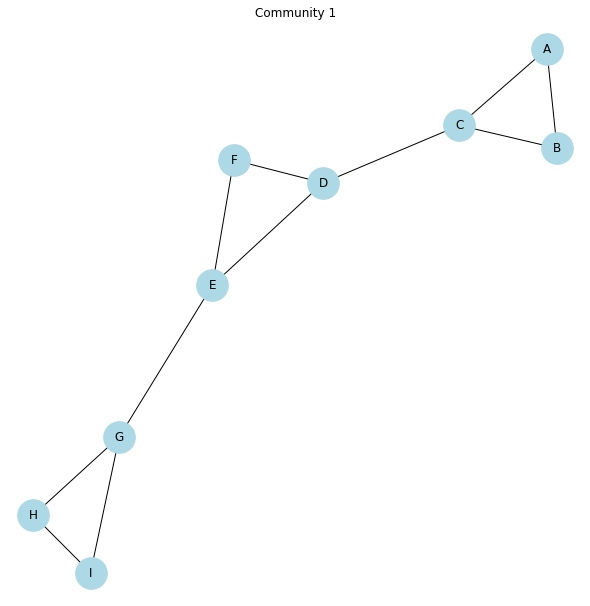

Number of components after iteration 1: 2
[{'C', 'B', 'A'}, {'F', 'G', 'E', 'I', 'H', 'D'}]


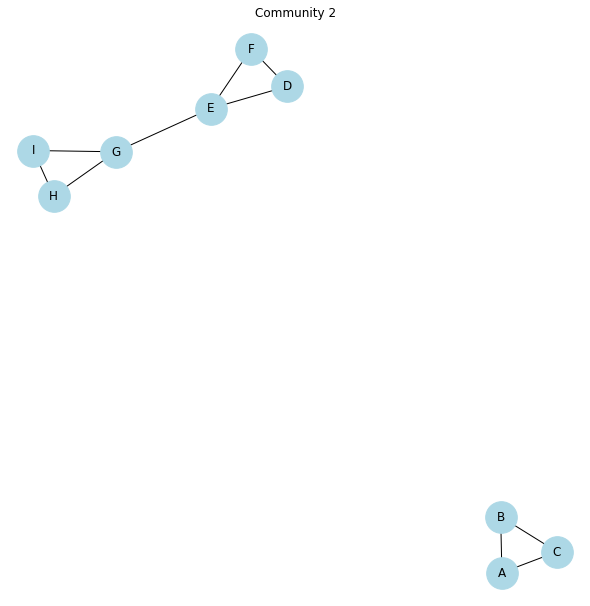

Number of components after iteration 2: 3
[{'C', 'B', 'A'}, {'E', 'D', 'F'}, {'I', 'G', 'H'}]


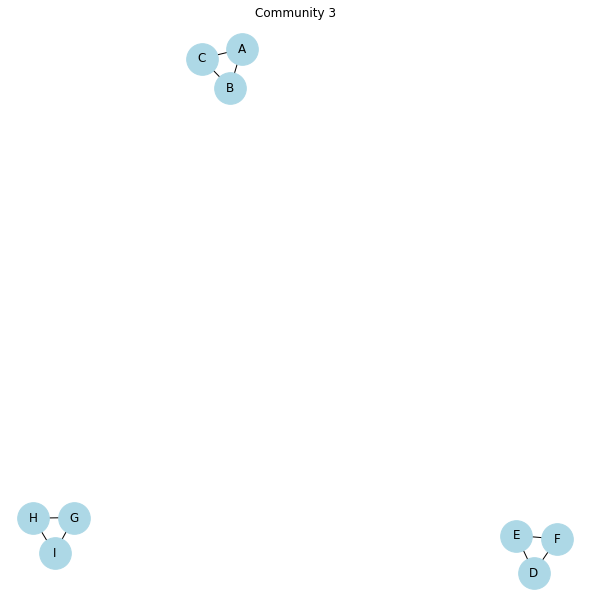

In [18]:
G = main_graph.copy()
# calculate betweenness centrality of all edges
betweenness = nx.edge_betweenness_centrality(G)

# initialize number of communities
num_communities = 0

# loop until we have desired number of communities
while num_communities < 3:
    # find edge with highest betweenness centrality
    max_betweenness = max(betweenness.values())
    edge_to_remove = [k for k, v in betweenness.items() if v == max_betweenness][0]
    
    # remove edge with highest betweenness centrality
    G.remove_edge(*edge_to_remove)

    # print the number of components and the nodes in each component
    print(f'Number of components after iteration {num_communities}: {nx.number_connected_components(G)}')
    print([component for component in nx.connected_components(G)])
    
    # recalculate betweenness centrality of all edges
    betweenness = nx.edge_betweenness_centrality(G)
    
    # increment number of communities
    num_communities += 1
    
    # plot the graph
    plt.figure(num_communities, figsize=figsize)
    nx.draw(G, with_labels=True, node_size=nodesize, font_size=font_size, node_color=node_color)
    plt.title(f"Community {num_communities}")
    plt.show()
